Implement the Image classification CNN modelfor classifying hand-written MNISTdataset by dividing the model into following 4 stages:


In [1]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
xtrain.shape

11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

In [2]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [4]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [6]:
h = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 20s 5ms/step - loss: 0.2232 - accuracy: 0.9313 - val_loss: 0.0879 - val_accuracy: 0.9729
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0615 - val_accuracy: 0.9824


In [7]:
from sklearn.metrics import classification_report as cf
preds = model.predict(xtest)
print(cf(ytest, preds.argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.97      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



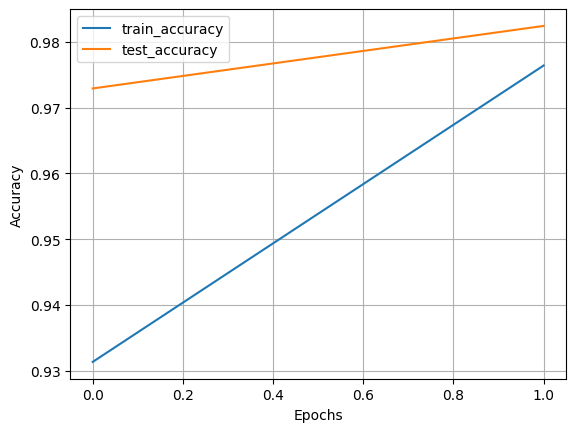

In [8]:
import matplotlib.pyplot as plt
epochs=2
plt.plot(range(0,epochs),h.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),h.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

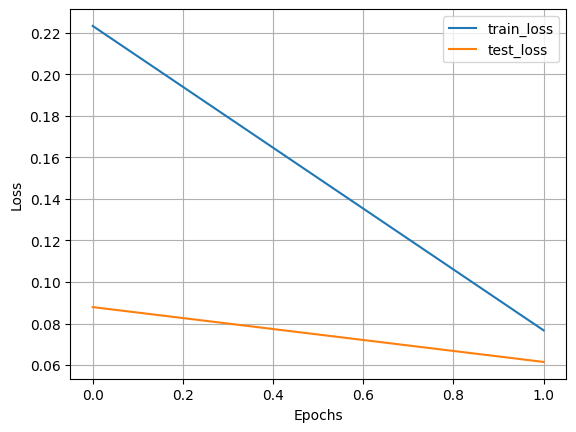

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),h.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),h.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();